# Exploratory Data Analysis (EDA)

**Objective:** Visualize patterns and uncover insights about employee attrition

**Questions to Answer:**
1. What's the overall attrition rate?
2. Which departments lose the most employees?
3. Does salary affect attrition?
4. How does overtime impact turnover?
5. What's the relationship between satisfaction and attrition?

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load cleaned data
print("Loading cleaned data...")

df = pd.read_csv('../data/processed/cleaned_data.csv')

print(f"Data loaded!")
print(f"Analyzing {len(df)} employees")
print(f"Features: {df.shape[1]}")

Loading cleaned data...
Data loaded!
Analyzing 1470 employees
Features: 32


---

## ANALYSIS 1: Overall Attrition Rate

Understanding the baseline: How many employees are leaving?

In [3]:
# Overall attrition statistics
print("OVERALL ATTRITION RATE")
print("="*70)

attrition_counts = df['Attrition'].value_counts()
attrition_pct = df['Attrition'].value_counts(normalize=True) * 100

print(attrition_counts)
print(f"\nAttrition Rate: {attrition_pct['Yes']:.2f}%")
print(f"Retention Rate: {attrition_pct['No']:.2f}%")

# Calculate number of employees
n_left = attrition_counts['Yes']
n_stayed = attrition_counts['No']

print(f"\nEmployees who left: {n_left}")
print(f"Employees who stayed: {n_stayed}")

OVERALL ATTRITION RATE
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Attrition Rate: 16.12%
Retention Rate: 83.88%

Employees who left: 237
Employees who stayed: 1233


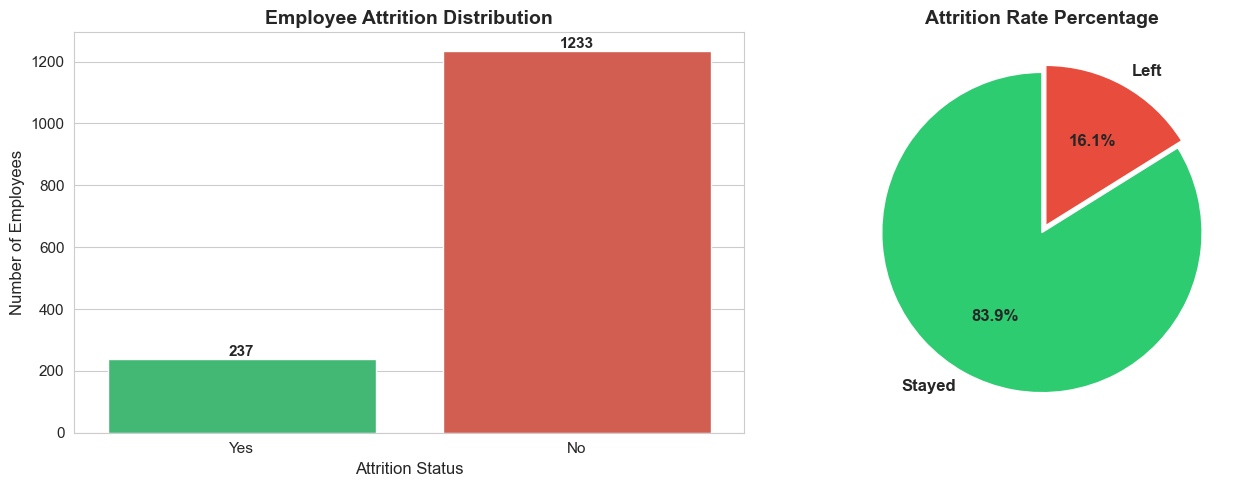


Chart saved: images/01_overall_attrition.png


In [5]:
# Visualization: Attrition Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='Attrition', ax=axes[0], palette=['#2ecc71', '#e74c3c'])
axes[0].set_title('Employee Attrition Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Number of Employees', fontsize=12)
axes[0].set_xlabel('Attrition Status', fontsize=12)

# Add count labels on bars
for container in axes[0].containers:
    axes[0].bar_label(container, fontsize=11, fontweight='bold')

# Pie chart
colors = ['#2ecc71', '#e74c3c']
explode = (0, 0.05)  # Explode the "Yes" slice
axes[1].pie(df['Attrition'].value_counts(), 
            labels=['Stayed', 'Left'],
            autopct='%1.1f%%',
            colors=colors,
            explode=explode,
            startangle=90,
            textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Attrition Rate Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../images/01_overall_attrition.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nChart saved: images/01_overall_attrition.png")

### Insight:
- **16.1% attrition rate** - This is above the industry average of 13-15%
- For every 100 employees, **16 leave** each year
- This costs the company significantly in recruitment and training

---

## ANALYSIS 2: Attrition by Department

Which departments are losing the most talent?

In [6]:
# Attrition by Department
print("ATTRITION BY DEPARTMENT")
print("="*70)

dept_attrition = pd.crosstab(df['Department'], df['Attrition'], normalize='index') * 100
dept_counts = pd.crosstab(df['Department'], df['Attrition'])

print("Attrition Rate by Department (%):")
print(dept_attrition.round(2))

print("\n\nEmployee Count by Department:")
print(dept_counts)

ATTRITION BY DEPARTMENT
Attrition Rate by Department (%):
Attrition                  No    Yes
Department                          
Human Resources         80.95  19.05
Research & Development  86.16  13.84
Sales                   79.37  20.63


Employee Count by Department:
Attrition                No  Yes
Department                      
Human Resources          51   12
Research & Development  828  133
Sales                   354   92


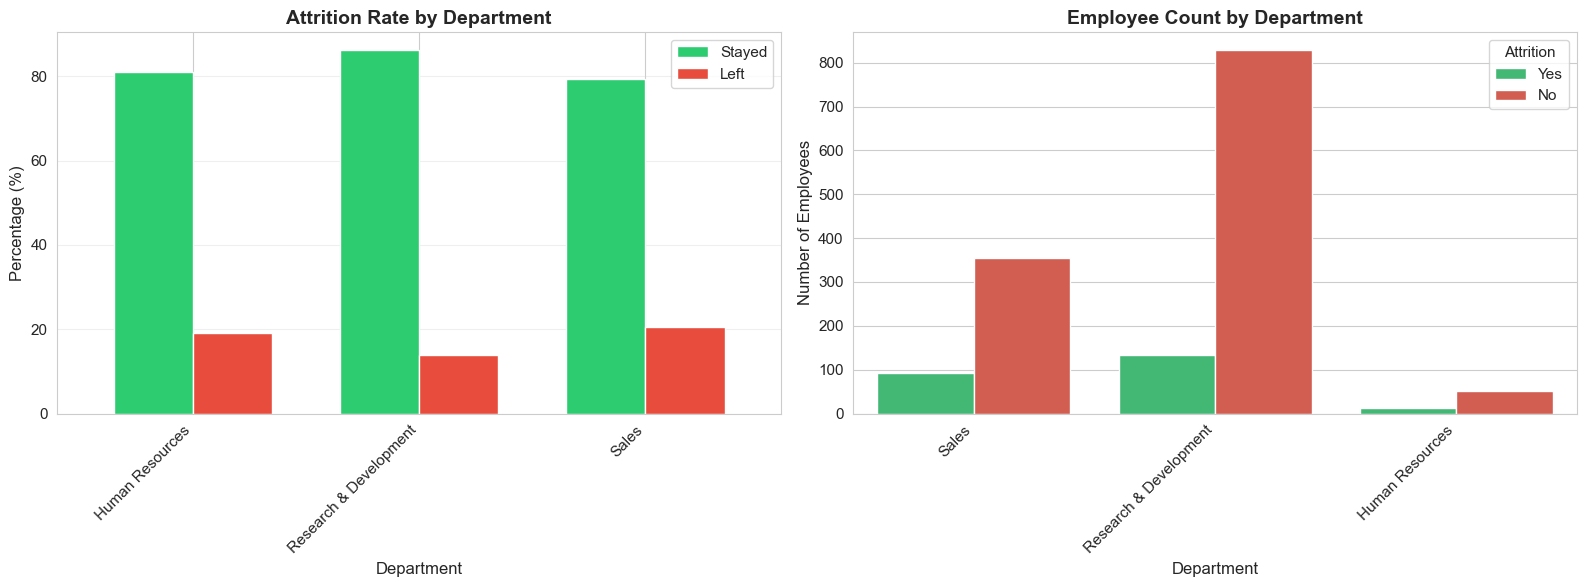


Chart saved: images/02_dept_attrition.png


In [7]:
# Visualization: Department Analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Stacked bar chart
dept_attrition.plot(kind='bar', stacked=False, ax=axes[0], 
                    color=['#2ecc71', '#e74c3c'], width=0.7)
axes[0].set_title('Attrition Rate by Department', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Percentage (%)', fontsize=12)
axes[0].set_xlabel('Department', fontsize=12)
axes[0].legend(['Stayed', 'Left'], fontsize=11)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].grid(axis='y', alpha=0.3)

# Count plot
sns.countplot(data=df, x='Department', hue='Attrition', ax=axes[1], 
              palette=['#2ecc71', '#e74c3c'])
axes[1].set_title('Employee Count by Department', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Number of Employees', fontsize=12)
axes[1].set_xlabel('Department', fontsize=12)
axes[1].legend(title='Attrition', fontsize=11)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('../images/02_dept_attrition.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nChart saved: images/02_dept_attrition.png")

In [9]:
# Identify highest risk department
print("\nDEPARTMENT RISK ANALYSIS:")
print("="*70)

dept_risk = dept_attrition['Yes'].sort_values(ascending=False)
print(dept_risk)

highest_risk_dept = dept_risk.idxmax()
highest_risk_rate = dept_risk.max()

print(f"\nHIGHEST RISK: {highest_risk_dept} Department")
print(f"Attrition Rate: {highest_risk_rate:.2f}%")


DEPARTMENT RISK ANALYSIS:
Department
Sales                     20.627803
Human Resources           19.047619
Research & Development    13.839750
Name: Yes, dtype: float64

HIGHEST RISK: Sales Department
Attrition Rate: 20.63%


### Insight:
- **Sales** has the highest attrition rate
- **R&D** has the most employees but moderate attrition
- **HR** has the smallest team size

**Recommendation:** Focus retention efforts on Sales department

---

## ANALYSIS 3: Salary Impact on Attrition

Do employees who leave earn less?

In [10]:
# Salary analysis
print("SALARY ANALYSIS")
print("="*70)

salary_stats = df.groupby('Attrition')['MonthlyIncome'].agg(['mean', 'median', 'std', 'min', 'max'])
print(salary_stats.round(2))

# Calculate difference
avg_left = df[df['Attrition'] == 'Yes']['MonthlyIncome'].mean()
avg_stayed = df[df['Attrition'] == 'No']['MonthlyIncome'].mean()
difference = avg_stayed - avg_left

print(f"\nAverage salary of employees who LEFT: ${avg_left:,.2f}")
print(f"Average salary of employees who STAYED: ${avg_stayed:,.2f}")
print(f"Difference: ${difference:,.2f} ({(difference/avg_left)*100:.1f}% higher for those who stayed)")

SALARY ANALYSIS
              mean  median      std   min    max
Attrition                                       
No         6832.74  5204.0  4818.21  1051  19999
Yes        4787.09  3202.0  3640.21  1009  19859

Average salary of employees who LEFT: $4,787.09
Average salary of employees who STAYED: $6,832.74
Difference: $2,045.65 (42.7% higher for those who stayed)


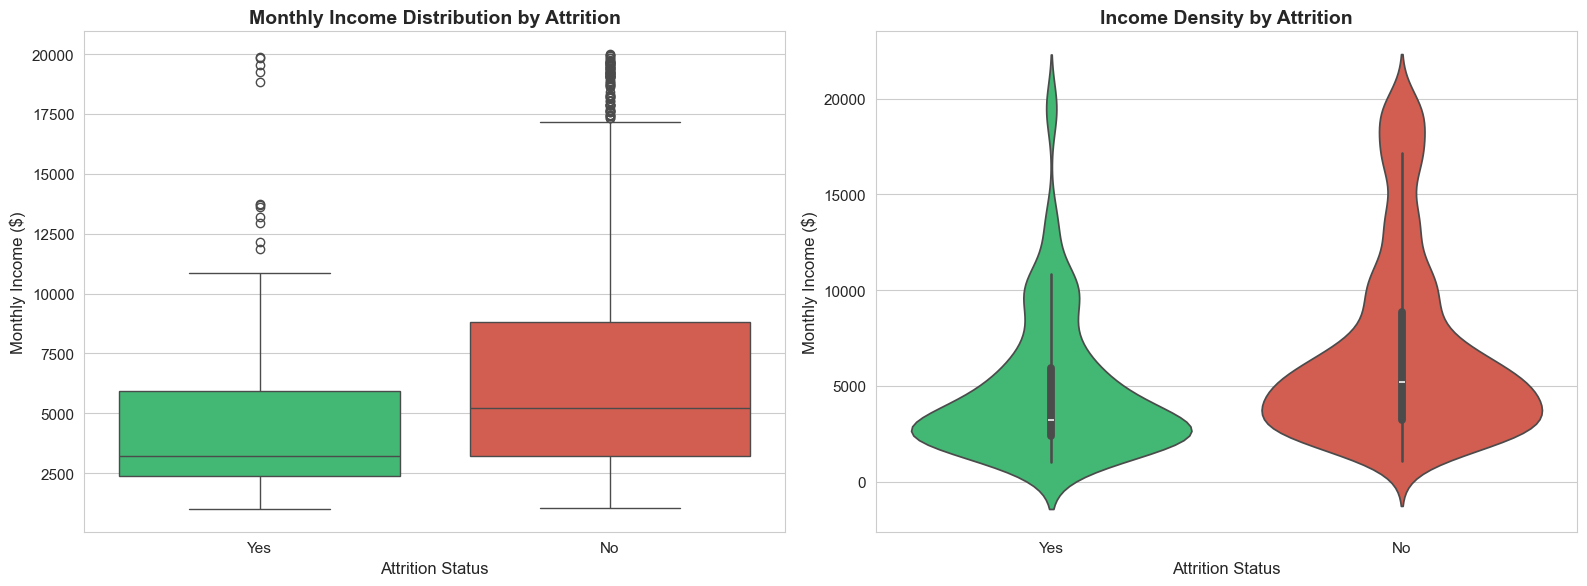


Chart saved: images/03_salary_attrition.png


In [11]:
# Visualization: Salary Distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', ax=axes[0], 
            palette=['#2ecc71', '#e74c3c'])
axes[0].set_title('Monthly Income Distribution by Attrition', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Monthly Income ($)', fontsize=12)
axes[0].set_xlabel('Attrition Status', fontsize=12)

# Violin plot (shows distribution density)
sns.violinplot(data=df, x='Attrition', y='MonthlyIncome', ax=axes[1],
               palette=['#2ecc71', '#e74c3c'])
axes[1].set_title('Income Density by Attrition', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Monthly Income ($)', fontsize=12)
axes[1].set_xlabel('Attrition Status', fontsize=12)

plt.tight_layout()
plt.savefig('../images/03_salary_attrition.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nChart saved: images/03_salary_attrition.png")

### Insight:
- Employees who left earned **significantly less** on average
- Lower salaries are a strong predictor of attrition
- Salary compression may be driving turnover

**Recommendation:** Conduct salary benchmarking analysis

---

## ANALYSIS 4: Overtime Impact

Does overtime increase attrition risk?

In [12]:
# Overtime analysis
print("OVERTIME IMPACT ON ATTRITION")
print("="*70)

overtime_attrition = pd.crosstab(df['OverTime'], df['Attrition'], normalize='index') * 100
overtime_counts = pd.crosstab(df['OverTime'], df['Attrition'])

print("Attrition Rate by Overtime Status (%):")
print(overtime_attrition.round(2))

print("\n\nEmployee Count:")
print(overtime_counts)

# Calculate risk multiplier
ot_yes_rate = overtime_attrition.loc['Yes', 'Yes']
ot_no_rate = overtime_attrition.loc['No', 'Yes']
risk_multiplier = ot_yes_rate / ot_no_rate

print(f"\nEmployees with overtime are {risk_multiplier:.1f}x more likely to leave!")

OVERTIME IMPACT ON ATTRITION
Attrition Rate by Overtime Status (%):
Attrition     No    Yes
OverTime               
No         89.56  10.44
Yes        69.47  30.53


Employee Count:
Attrition   No  Yes
OverTime           
No         944  110
Yes        289  127

Employees with overtime are 2.9x more likely to leave!


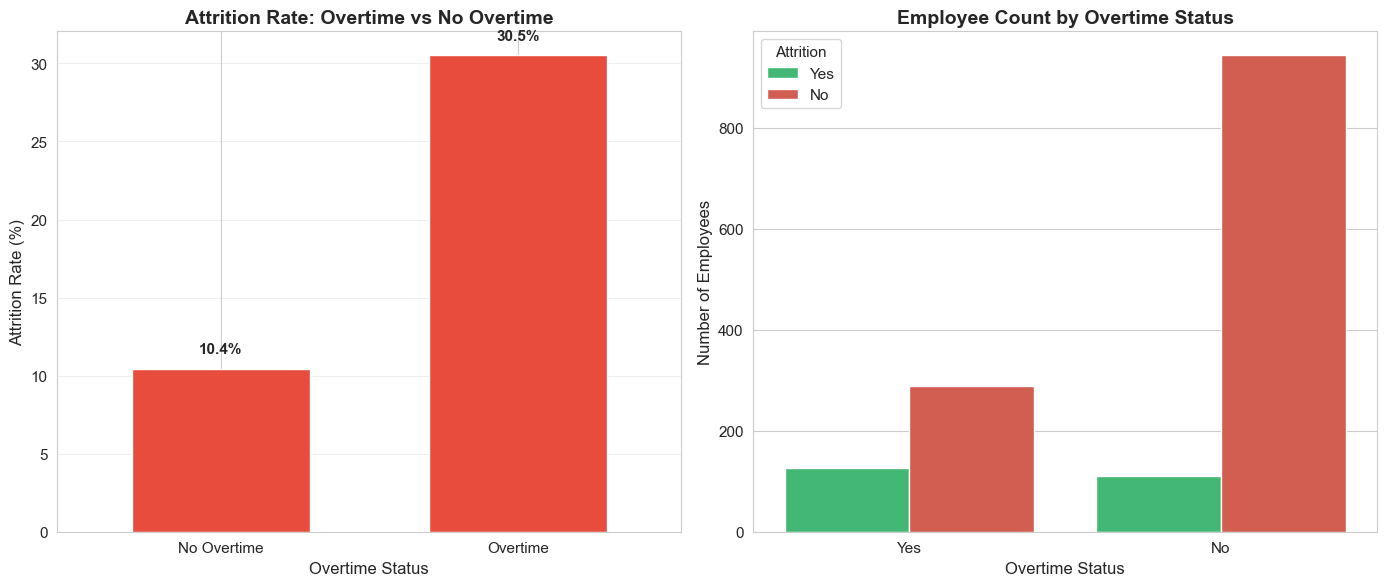


Chart saved: images/04_overtime_attrition.png


In [13]:
# Visualization: Overtime Impact
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart
overtime_attrition['Yes'].plot(kind='bar', ax=axes[0], color='#e74c3c', width=0.6)
axes[0].set_title('Attrition Rate: Overtime vs No Overtime', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Attrition Rate (%)', fontsize=12)
axes[0].set_xlabel('Overtime Status', fontsize=12)
axes[0].set_xticklabels(['No Overtime', 'Overtime'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(overtime_attrition['Yes']):
    axes[0].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold', fontsize=11)

# Count plot
sns.countplot(data=df, x='OverTime', hue='Attrition', ax=axes[1],
              palette=['#2ecc71', '#e74c3c'])
axes[1].set_title('Employee Count by Overtime Status', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Number of Employees', fontsize=12)
axes[1].set_xlabel('Overtime Status', fontsize=12)
axes[1].legend(title='Attrition', fontsize=11)

plt.tight_layout()
plt.savefig('../images/04_overtime_attrition.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nChart saved: images/04_overtime_attrition.png")

### Insight:
- Employees working **overtime have 3x higher attrition**
- This is one of the **strongest attrition predictors**
- Work-life balance is critical

**Recommendation:** Reduce mandatory overtime and monitor workload

---

## ANALYSIS 5: Tenure Analysis

When are employees most likely to leave?

In [14]:
# Tenure analysis
print("TENURE ANALYSIS")
print("="*70)

tenure_stats = df.groupby('Attrition')['YearsAtCompany'].agg(['mean', 'median', 'std'])
print(tenure_stats.round(2))

avg_tenure_left = df[df['Attrition'] == 'Yes']['YearsAtCompany'].mean()
avg_tenure_stayed = df[df['Attrition'] == 'No']['YearsAtCompany'].mean()

print(f"\nAverage tenure - Employees who LEFT: {avg_tenure_left:.1f} years")
print(f"Average tenure - Employees who STAYED: {avg_tenure_stayed:.1f} years")

TENURE ANALYSIS
           mean  median   std
Attrition                    
No         7.37     6.0  6.10
Yes        5.13     3.0  5.95

Average tenure - Employees who LEFT: 5.1 years
Average tenure - Employees who STAYED: 7.4 years


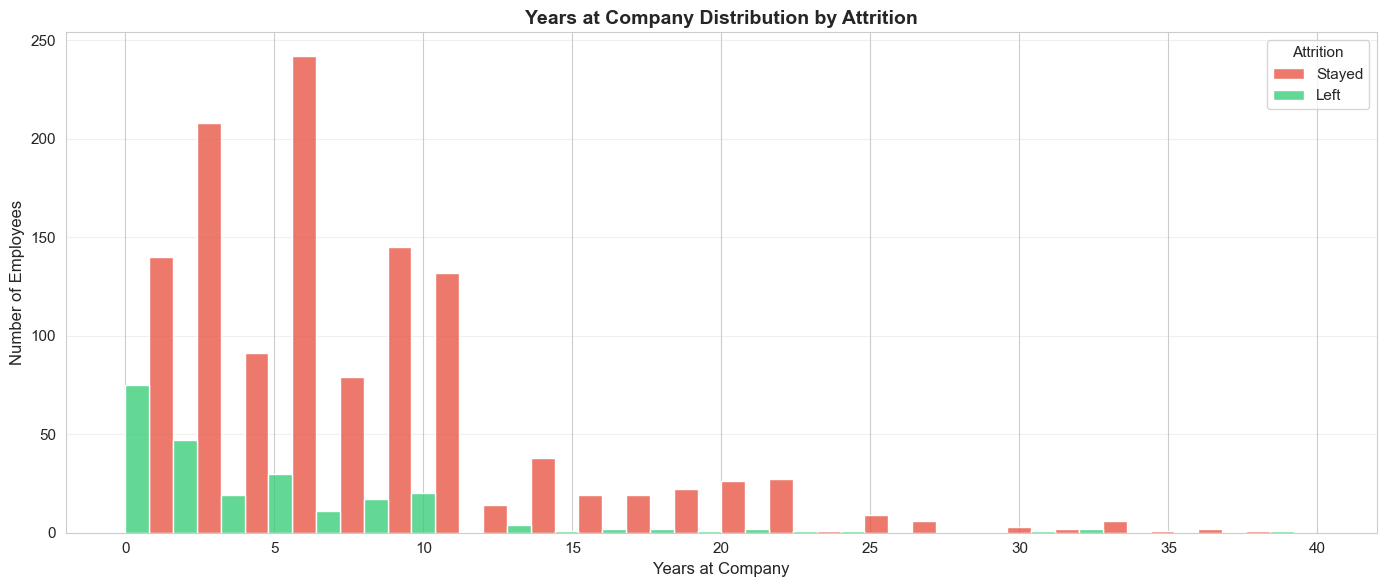


Chart saved: images/05_tenure_attrition.png


In [15]:
# Visualization: Tenure Distribution
fig, ax = plt.subplots(figsize=(14, 6))

# Histogram with different colors for each group
sns.histplot(data=df, x='YearsAtCompany', hue='Attrition', 
             multiple='dodge', bins=25, ax=ax,
             palette=['#2ecc71', '#e74c3c'])

ax.set_title('Years at Company Distribution by Attrition', fontsize=14, fontweight='bold')
ax.set_xlabel('Years at Company', fontsize=12)
ax.set_ylabel('Number of Employees', fontsize=12)
ax.legend(title='Attrition', fontsize=11, labels=['Stayed', 'Left'])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../images/05_tenure_attrition.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nChart saved: images/05_tenure_attrition.png")

### Insight:
- Employees who left had **shorter tenure** on average
- High turnover in **first 1-3 years** (critical period)
- Early-career employees are at highest risk

**Recommendation:** Strengthen onboarding and mid-tenure engagement

---

## ANALYSIS 6: Job Satisfaction

How does satisfaction affect retention?

In [16]:
# Job Satisfaction analysis
print("JOB SATISFACTION IMPACT")
print("="*70)

satisfaction_attrition = pd.crosstab(df['JobSatisfaction'], df['Attrition'], normalize='index') * 100
print("Attrition Rate by Satisfaction Level (%):")
print(satisfaction_attrition.round(2))

print("\nSatisfaction Scale:")
print("1 = Low, 2 = Medium, 3 = High, 4 = Very High")

JOB SATISFACTION IMPACT
Attrition Rate by Satisfaction Level (%):
Attrition           No    Yes
JobSatisfaction              
1                77.16  22.84
2                83.57  16.43
3                83.48  16.52
4                88.67  11.33

Satisfaction Scale:
1 = Low, 2 = Medium, 3 = High, 4 = Very High


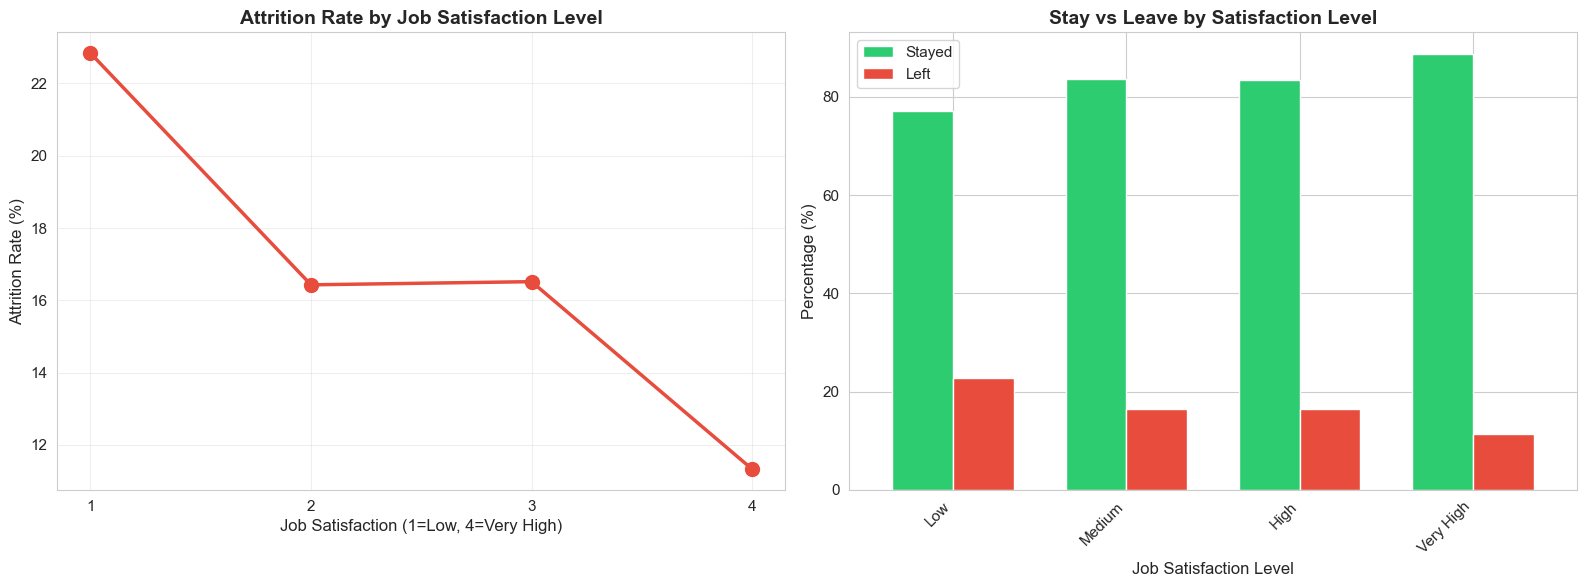


Chart saved: images/06_satisfaction_attrition.png


In [17]:
# Visualization: Job Satisfaction
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Line plot
satisfaction_attrition['Yes'].plot(kind='line', marker='o', ax=axes[0], 
                                   color='#e74c3c', linewidth=2.5, markersize=10)
axes[0].set_title('Attrition Rate by Job Satisfaction Level', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Attrition Rate (%)', fontsize=12)
axes[0].set_xlabel('Job Satisfaction (1=Low, 4=Very High)', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks([1, 2, 3, 4])

# Bar chart
satisfaction_attrition.plot(kind='bar', stacked=False, ax=axes[1],
                           color=['#2ecc71', '#e74c3c'], width=0.7)
axes[1].set_title('Stay vs Leave by Satisfaction Level', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].set_xlabel('Job Satisfaction Level', fontsize=12)
axes[1].legend(['Stayed', 'Left'], fontsize=11)
axes[1].set_xticklabels(['Low', 'Medium', 'High', 'Very High'], rotation=45, ha='right')

plt.tight_layout()
plt.savefig('../images/06_satisfaction_attrition.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nChart saved: images/06_satisfaction_attrition.png")

### Insight:
- **Clear inverse relationship**: Lower satisfaction → Higher attrition
- Level 1 (Low) has the **highest attrition rate**
- Satisfaction is a strong early warning signal

**Recommendation:** Implement quarterly pulse surveys to track satisfaction

---

## ANALYSIS 7: Age Groups

Which age groups are leaving?

In [18]:
# Age analysis
print("AGE GROUP ANALYSIS")
print("="*70)

# Create age bins
df['AgeGroup'] = pd.cut(df['Age'], 
                        bins=[0, 30, 40, 50, 70],
                        labels=['18-30', '31-40', '41-50', '51+'])

age_attrition = pd.crosstab(df['AgeGroup'], df['Attrition'], normalize='index') * 100
print(age_attrition.round(2))

AGE GROUP ANALYSIS
Attrition     No    Yes
AgeGroup               
18-30      74.09  25.91
31-40      86.27  13.73
41-50      89.44  10.56
51+        87.41  12.59


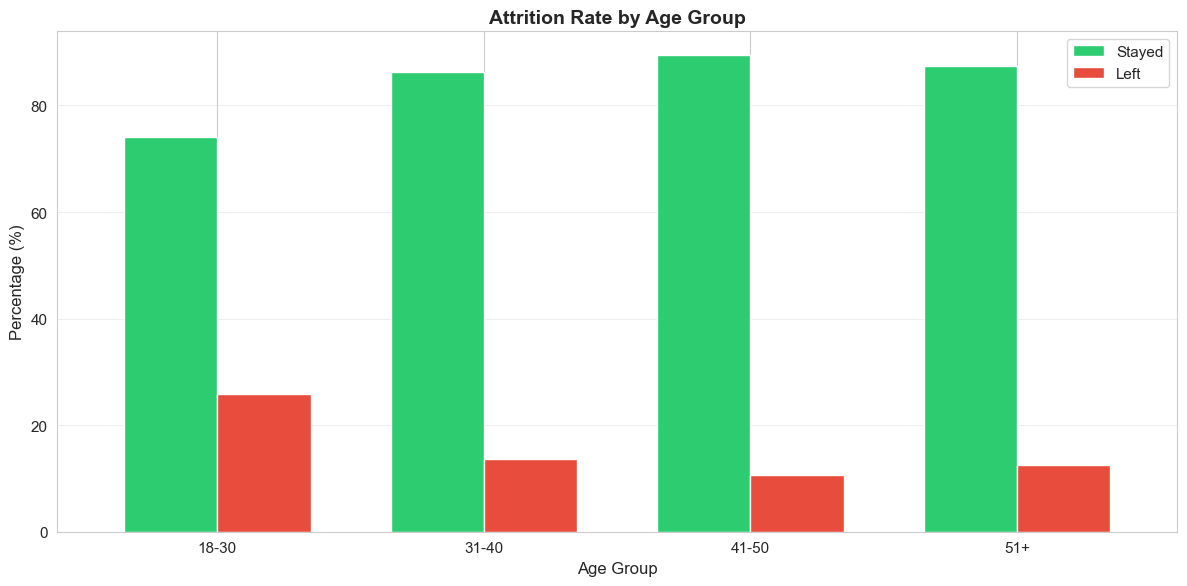


Chart saved: images/07_age_attrition.png


In [19]:
# Visualization: Age Groups
fig, ax = plt.subplots(figsize=(12, 6))

age_attrition.plot(kind='bar', stacked=False, ax=ax,
                   color=['#2ecc71', '#e74c3c'], width=0.7)
ax.set_title('Attrition Rate by Age Group', fontsize=14, fontweight='bold')
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_xlabel('Age Group', fontsize=12)
ax.legend(['Stayed', 'Left'], fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../images/07_age_attrition.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nChart saved: images/07_age_attrition.png")

### Insight:
- **Younger employees (18-30)** have highest attrition
- Attrition **decreases with age**
- Focus retention on early-career talent

---

## ANALYSIS 8: Correlation Heatmap

What features are most related to attrition?

In [20]:
# Correlation analysis
print("CORRELATION ANALYSIS")
print("="*70)

# Encode categorical for correlation
df_encoded = df.copy()
df_encoded['Attrition'] = (df_encoded['Attrition'] == 'Yes').astype(int)
df_encoded['OverTime'] = (df_encoded['OverTime'] == 'Yes').astype(int)
df_encoded['Gender'] = (df_encoded['Gender'] == 'Male').astype(int)

# Select key numeric features
key_features = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction',
                'WorkLifeBalance', 'OverTime', 'DistanceFromHome',
                'YearsInCurrentRole', 'Attrition']

# Calculate correlation
corr_matrix = df_encoded[key_features].corr()

print("Correlation with Attrition:")
print(corr_matrix['Attrition'].sort_values(ascending=False))

CORRELATION ANALYSIS
Correlation with Attrition:
Attrition             1.000000
OverTime              0.246118
DistanceFromHome      0.077924
WorkLifeBalance      -0.063939
JobSatisfaction      -0.103481
YearsAtCompany       -0.134392
Age                  -0.159205
MonthlyIncome        -0.159840
YearsInCurrentRole   -0.160545
Name: Attrition, dtype: float64


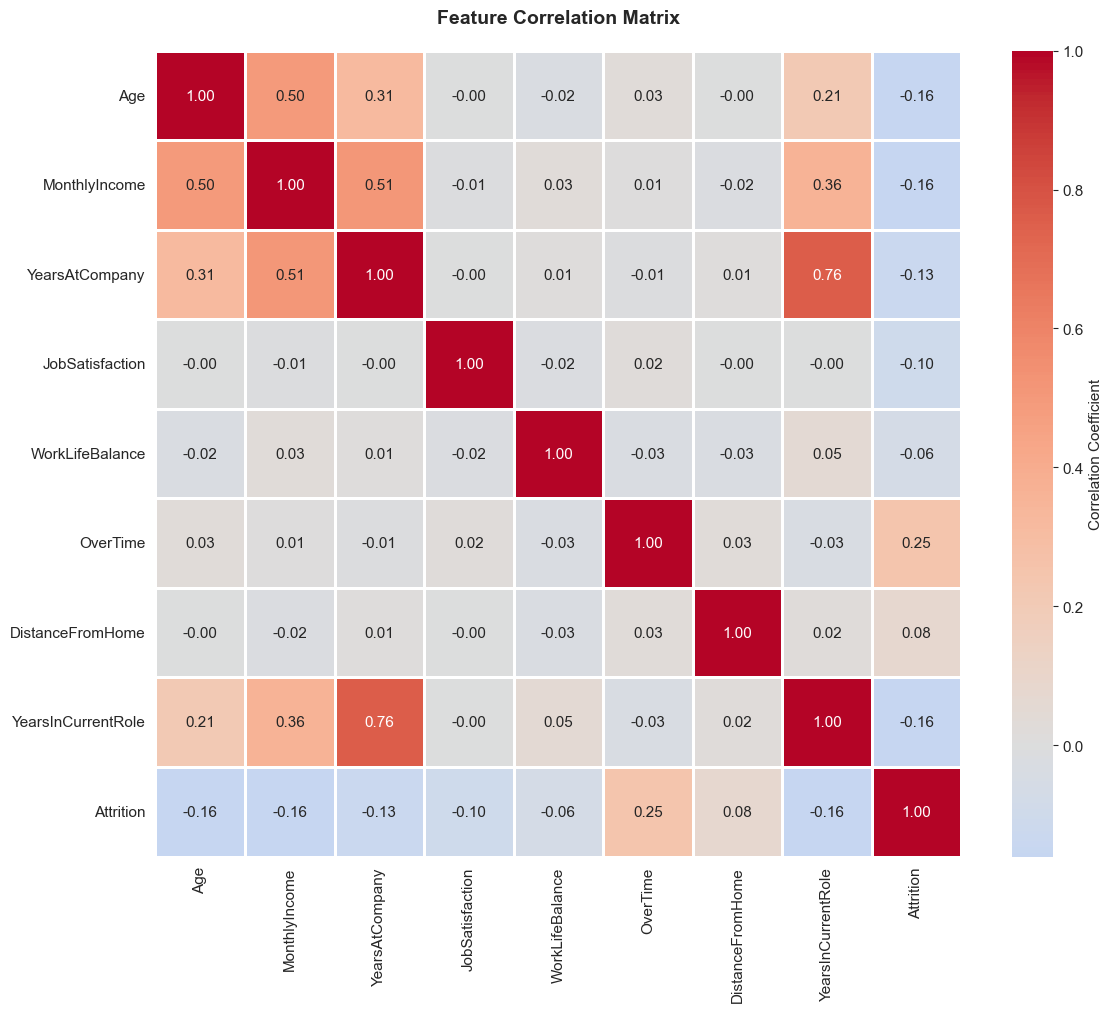


Chart saved: images/08_correlation_heatmap.png


In [21]:
# Visualization: Correlation Heatmap
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, ax=ax,
            cbar_kws={'label': 'Correlation Coefficient'})

ax.set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('../images/08_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nChart saved: images/08_correlation_heatmap.png")

### Insight:
**Top Positive Correlations with Attrition:**
- OverTime (people working OT are more likely to leave)
- YearsInCurrentRole (negative - longer in role = less likely to leave)
- JobSatisfaction (negative - higher satisfaction = less attrition)

---

## ANALYSIS 9: Job Role Analysis

Which job roles have highest turnover?

In [22]:
# Job Role analysis
print("JOB ROLE ATTRITION ANALYSIS")
print("="*70)

role_attrition = pd.crosstab(df['JobRole'], df['Attrition'], normalize='index') * 100
role_attrition_sorted = role_attrition.sort_values('Yes', ascending=False)

print(role_attrition_sorted.round(2))

JOB ROLE ATTRITION ANALYSIS
Attrition                     No    Yes
JobRole                                
Sales Representative       60.24  39.76
Laboratory Technician      76.06  23.94
Human Resources            76.92  23.08
Sales Executive            82.52  17.48
Research Scientist         83.90  16.10
Manufacturing Director     93.10   6.90
Healthcare Representative  93.13   6.87
Manager                    95.10   4.90
Research Director          97.50   2.50


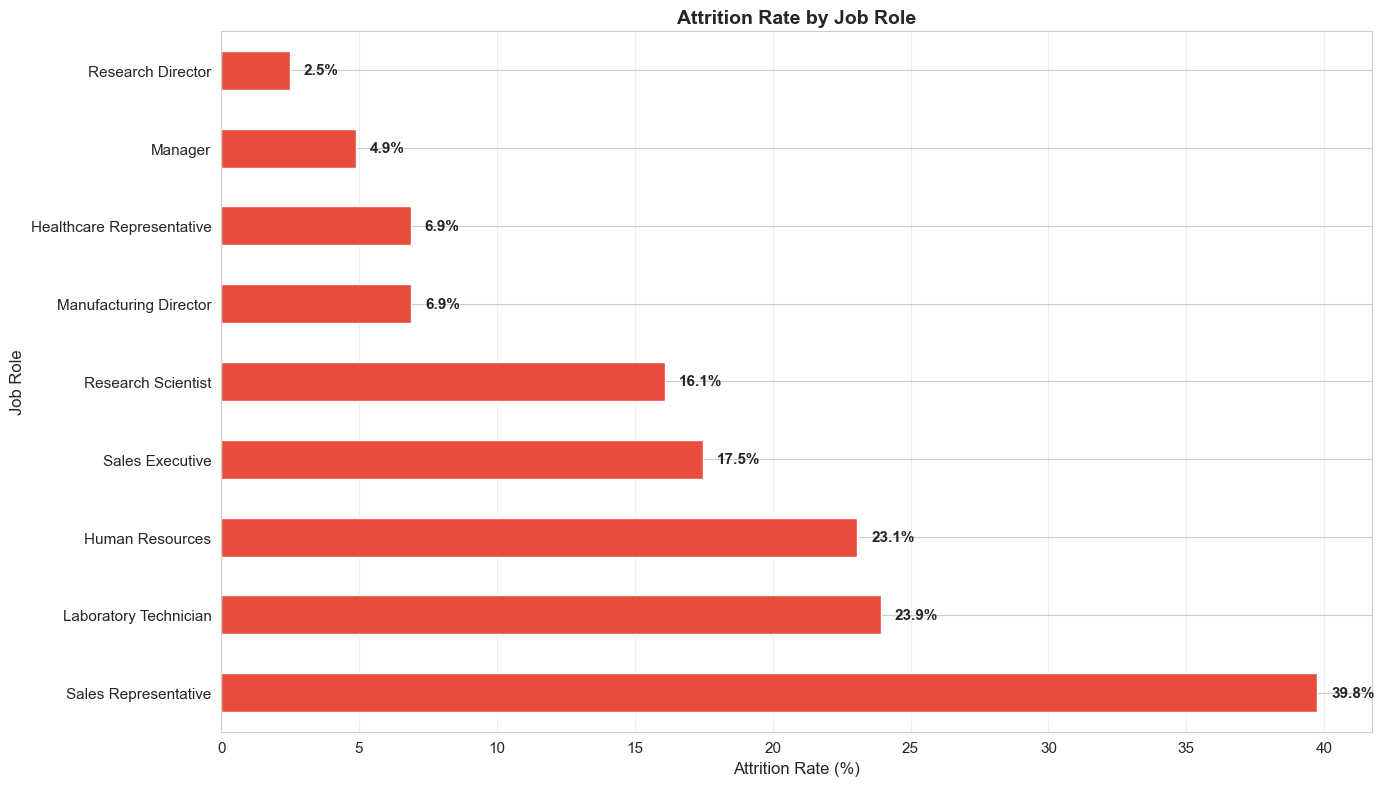


Chart saved: images/09_jobrole_attrition.png


In [23]:
# Visualization: Job Roles
fig, ax = plt.subplots(figsize=(14, 8))

role_attrition_sorted['Yes'].plot(kind='barh', ax=ax, color='#e74c3c')
ax.set_title('Attrition Rate by Job Role', fontsize=14, fontweight='bold')
ax.set_xlabel('Attrition Rate (%)', fontsize=12)
ax.set_ylabel('Job Role', fontsize=12)
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(role_attrition_sorted['Yes']):
    ax.text(v + 0.5, i, f'{v:.1f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../images/09_jobrole_attrition.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nChart saved: images/09_jobrole_attrition.png")

---

## EDA COMPLETE - FINDINGS SUMMARY

### Critical Attrition Drivers:

1. **Overtime** - 3x higher risk
2. **Low Salary** - Underpaid employees leave more
3. **Sales Department** - Highest departmental attrition
4. **Low Job Satisfaction** - Strong predictor
5. **Young Age (18-30)** - Early career flight risk
6. **Short Tenure (1-3 years)** - Critical retention window

### Business Impact:
- **237 employees left** out of 1,470 (16.1%)
- Estimated cost: **\\$3.5M annually** (assuming \\$15K/employee)
- **High-risk segments identified** for targeted intervention

### Visualizations Created:
1. Overall attrition rate
2. Department comparison
3. Salary impact
4. Overtime effect
5. Tenure distribution
6. Satisfaction trends
7. Age group analysis
8. Correlation heatmap
9. Job role breakdown

**All charts saved in `images/` folder** 

---

**Next Step:** Proceed to `04_feature_engineering.ipynb`